# Sesión 12
> Por Christian Rubio Montiel (CRM)
Implementación por Josue Río Campos Becerra, Moisés Borjan Ramírez, Oscar David Domínguez Dávila, Luis Ramos Guerrero y Kevin Martin Rivera Castro y CRM.

En esta sesión se da otra solución al problema de ordenación mediante el algoritmo Quicksort. Se introduce el concepto de tiempo de ejecución esperado.

<a id='indice'></a>
### Índice
---
1. **[PARTITION](#Partition)**
2. **[QUICKSORT](#quick-sort)**
3. **[Experimentación](#experimentacion)**
4. **[Particiones Balanceadas](#balanceadas)**
5. **[Experimentación'](#experimentacion2)**
6. **[Referencias](#referencias)**
---

Este algoritmo también usa la técnica de Divide y Vencerás. Recordemos que el proceso lo podemos describir en tres pasos. Dado el subarreglo de números $A[p..r]$ con $1\leq p \leq r \leq n$ (el arreglo $A$ está indizado de $1$ a su longitud es $n$) deseamos que la salida sea el arreglo $A$ ordenado del índice $p$ al índice $r$.

- *Divide*: Particiona el arreglo $A[p..r]$ en dos subarreglos (posiblemente alguno vacío) usando el elemento de la posición $r$ como pivote: subrutina *PARTITION*.

- *Vence*: De manera recursiva, repite el proceso en cada uno de los subarreglos.

- *Combina*: Una vez que los subarreglos están ordenados, al *mezclarlos*, el arreglo $A[p..r]$ queda ordenado.

<a id='Partition'></a>
## 1. PARTITION

La siguiente rutina toma como entrada un arreglo $A$ del índice $p$ al índice $r$ ($p\leq r$) y usa como *pivote* el elemento $x$, en este caso el elemento en el índice $r$, para dar como salida el arreglo $A$ del índice $p$ al índice $r$ de tal manera que $x$ está en su lugar, los elementos a su izquierda son menores o iguales y los elementos a su derecha son mayores.

*PARTITION($A$,$p$,$r$)*
1. $x=A[r]$
2. $i=p-1$
3. **for** $j=p$ to $r-1$ **do**
4. $\hspace{0.6cm}$**if** $A[j]\leq x$ **then**
5. $\hspace{0.6cm}i=i+1$
6. $\hspace{0.57cm}$ exchange$(A[i],A[j])$
7. exchange($A[i+1],A[r])$
8. **return** $i+1$

Verificamos que el algoritmo es correcto. El caso base es cuando $p=r$, en este caso $x=A[r]$, $i=p-1$, el ciclo **for** se sale de rango así que se aplica la línea 7 directamente, intercambiando el mismo elemento $A[p]$ con $A[r]$, regresando el valor $p$.

La hípótesis de inducción la consideramos en el  $j$-ésimo paso, asumiendo que el índice $i$ separá a los elementos menores o iguales al pivote, mientras que el índice $j$ separa a las mayores.

En la inducción, la línea 4 tiene dos casos. Si entra el condicional **if**, quiere decir que $A[k+1]$ es menor o igual al pivote, entonces recorré el índice $i$ en la línea 5, mientras que en la línea 6 lo intercambia en esa posición, posteriormente termina el condicional **if**. Si no entra el ciclo **if**, es porque el elemento en cuestión es mayor que el pivote.
En la finalización, termina el ciclo **for**, por lo que en la línea 7 solo coloca al pivote en su sitio.

Es claro que el algoritmo tiene tiempo de ejecución lineal, determinado en el ciclo **for** que recorre el arreglo.

In [1]:
function PARTITION(A,p,r)
    x=A[r]
    i=p-1
    for j in p:r-1
        if A[j]<=x
            i=i+1
            A[i],A[j]=A[j],A[i]
        end
    end
    A[i+1],A[r]=A[r],A[i+1]
    return i+1
end

PARTITION (generic function with 1 method)

Regresar al **[Índice](#indice)**.

<a id='quick-sort'></a>
   ## 2. QUICKSORT

A continuación veremos algoritmo Quicksort, el cual recibe de entrada un arreglo $A$ del índice $p$ al índice $r$ ($p\leq r$).

*QUICKSORT($A$,$p$,$r$)*
1. **if** $q<r$ **then**
2. $\hspace{0.3cm}q=$ PARTITION($A$,$p$,$r$)
3. $\hspace{0.3cm}$ QUICKSORT($A$,$p$,$q-1$)
4. $\hspace{0.3cm}$ QUICKSORT($A$,$q+1$,$r$)

El caso base del algoritmo es cuando $p=r$, para el cual, no entra el ciclo **if**. La hipósis de inducción se aplica en las líneas 3 y 4, por lo que asumimos que devuelve arreglos ordenados, la línea 3 los elementos a la izquierda del pivite $q$, mientras que la línea 4 los elementos a la derecha del pivote, por lo que el algoritmo es correcto.

El tiempo de ejecución es relativamente sencillo calcularlo. Será $T(n)=T(n-1)+T(1)+\theta(n)$, lo que indica que $T(n)=O(n^2)$.

In [2]:
function QUICKSORT(A,p,r)
    if p < r
        d=PARTITION(A,p,r)
        QUICKSORT(A,p,d-1)
        QUICKSORT(A,d+1,r)
    end
    return length(A)
end

QUICKSORT (generic function with 1 method)

Aquí, conviene hecer un ejemplo donde se ejecute línea a línea el algoritmo. Considere $A=[5,8,6,9,7,2,3,0,1]$ y pida a los alumnos que le vayan diciendo los pasos a seguir. Ver [Quicksort Dance](https://youtu.be/ywWBy6J5gz8)

In [3]:
A=[5,8,6,9,7,2,3,0,1];
QUICKSORT(A,1,length(A));
print(A)

[0, 1, 2, 3, 5, 6, 7, 8, 9]

Regresar al **[Índice](#indice)**.

<a id='experimentacion'></a>
## 3. Experimentación en el tiempo de ejecución

Vamos a realizar 16 ejecuciones del algoritmo para entradas Aj de tamaño 100000j con entradas aleatorias con $j\in\{1,\dots,16\}$.

In [4]:
using Plots

In [5]:
y = []
for j in 1:16
    Aj = rand(2000000*j)
push!(y,@elapsed QUICKSORT(Aj,1,length(Aj)))
    println(length(Aj)," ",y[j])
end

2000000 0.179615039
4000000 0.379947182
6000000 0.58166476
8000000 0.794867163
10000000 1.006263581
12000000 1.207403578
14000000 1.39423437
16000000 1.622863911
18000000 1.830729965
20000000 2.067773564
22000000 2.294620349
24000000 2.551978473
26000000 2.777195753
28000000 2.972017885
30000000 3.236043286
32000000 3.384815053


A continuación, graficaremos los puntos $(n,time)$ donde $n$ corresponde al tamaño del arreglo y para fines prácticos, redondearemos los tiempos.

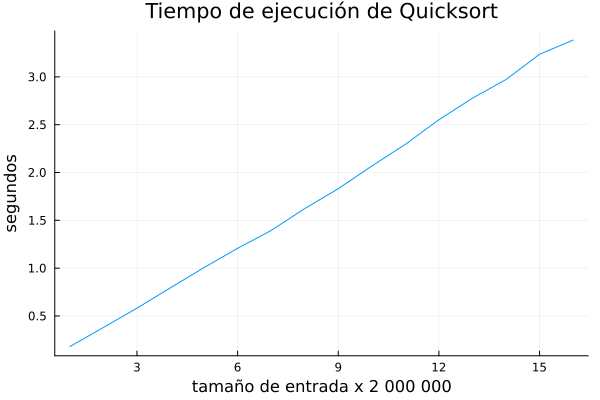

In [6]:
x = range(1, 16, length = 16)
plot(x, y, legend = false)
xaxis!("tamaño de entrada x 2 000 000")
yaxis!("segundos")
title!("Tiempo de ejecución de Quicksort")

De acuerdo a nuestro análisis, el tiempo de QUICKSORT es cuadrático, así que ahora ajustaremos una curva cuadrática vía mínimos cuadrados (en color rojo) y la dibujaremos encima de la curva azul, ver [$[1]$](#referencias).

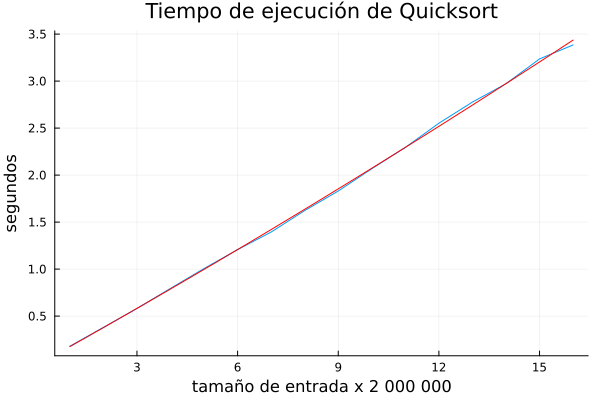

In [7]:
M = zeros(Int64, 3, 3)
M[1, 1] = 16
M[1, 2] = sum(x)
M[1, 3] = sum(x .^ 2)
M[2, 1] = sum(x)
M[2, 2] = sum(x .^ 2)
M[2, 3] = sum(x .^ 3)
M[3, 1] = sum(x .^ 2)
M[3, 2] = sum(x .^ 3)
M[3, 3] = sum(x .^ 4)
S=M^(-1)*[sum(y), sum(y.*x), sum(y.*(x.^2))]

P(x) =  S[1]+S[2]*x+S[3]*x^2

w = range(1, 16, length = 1000)
z = P.(w)
plot!(w, z, color = :red)

Regresar al **[Índice](#indice)**.

<a id='balanceadas'></a>
## 4. Particiones balanceadas

Si hacemos un análisis sobre el tiempo de ejecución de Quicksort, donde asumimos que en el peor de los casos, la partición inducida por el pivote establece que a la derecha hay $\theta(an)$ elemetos mientras que a la izquerda hay $\theta(bn)$ elentos donde $a+b=1$, entonces la recursión $T(n)=T(an)+T(bn)+\theta(n)$ se puede resolver con el método del árbol obteniendo así $T(n)=\theta(n\lg(n))$.

*RANDOMIZED-PARTITION($A$,$p$,$r$)*
1. $i=$ RANDOM $(p,r)$
2. exchange $(A[r],A[i])$
3. **return** PARTITION($A$,$p$,$r$)

*RANDOMIZED-QUICKSORT($A$,$p$,$r$)*
1. **if** $q<r$ **then**
2. $\hspace{0.3cm}q=$ PARTITION($A$,$p$,$r$)
3. $\hspace{0.3cm}$ RANDOMIZED-QUICKSORT($A$,$p$,$q-1$)
4. $\hspace{0.3cm}$ RANDOMIZED-QUICKSORT($A$,$q+1$,$r$)

In [8]:
function RANDOMIZED_PARTITION(A,p,r)
    i = rand(p:r)              
    A[r],A[i]=A[i],A[r]                             
    return PARTITION(A,p,r)    
end

RANDOMIZED_PARTITION (generic function with 1 method)

In [9]:
function RANDOMIZED_QUICKSORT(A,p,r)
    if p < r
        q = RANDOMIZED_PARTITION(A,p,r)
        RANDOMIZED_QUICKSORT(A,p,q-1)
        RANDOMIZED_QUICKSORT(A,q+1,r)
    end
    return length(A)
end

RANDOMIZED_QUICKSORT (generic function with 1 method)

In [10]:
A=[5,8,6,9,7,2,3,0,1];
RANDOMIZED_QUICKSORT(A,1,length(A));
print(A)

[0, 1, 2, 3, 5, 6, 7, 8, 9]

Regresar al **[Índice](#indice)**.

<a id='experimentacion2'></a>
## 5. Experimentación en el tiempo de ejecución'

In [11]:
y = []
for j in 1:16
    Aj = rand(2000000*j)
push!(y,@elapsed RANDOMIZED_QUICKSORT(Aj,1,length(Aj)))
    println(length(Aj)," ",y[j])
end

2000000 0.243139308
4000000 0.472375223
6000000 0.725860892
8000000 0.992902645
10000000 1.270036397
12000000 1.500781689
14000000 1.811127682
16000000 2.05663234
18000000 2.355619594
20000000 2.660011674
22000000 2.926666969
24000000 3.211767571
26000000 3.487105293
28000000 3.763753633
30000000 3.981286001
32000000 4.281604608


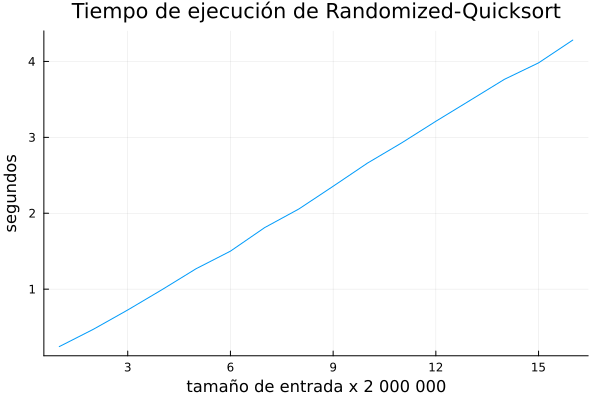

In [12]:
x = range(1, 16, length = 16)
f=plot(x, y, legend = false)
xaxis!("tamaño de entrada x 2 000 000")
yaxis!("segundos")
title!("Tiempo de ejecución de Randomized-Quicksort")

De acuerdo a nuestro análisis, el tiempo de Randomized-Quicksort es de orden $\theta(n\lg(n))$, así que ahora ajustaremos una curva de la forma $a_0+a_1\lg(n)+a_2n+a_3n\lg(n)$ vía mínimos cuadrados (en color rojo) y la dibujaremos encima de la curva azul, ver [$[1]$](#referencias).

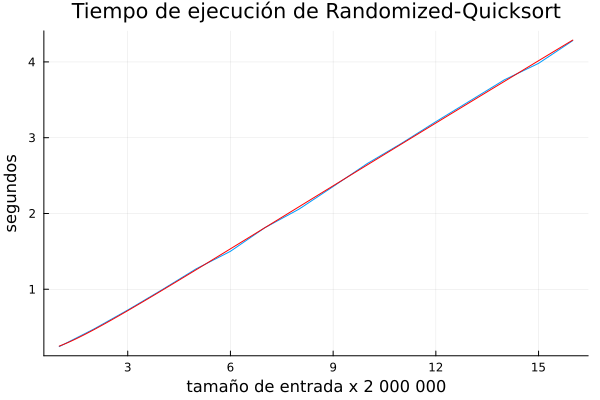

In [13]:
M = zeros(4, 4)
M[1, 1] = 16
M[1, 2] = sum(log2.(x))
M[1, 3] = sum(x)
M[1, 4] = sum(x .* log2.(x))
M[2, 1] = sum(log2.(x))
M[2, 2] = sum(log2.(x) .^ 2)
M[2, 3] = sum(x .* log2.(x))
M[2, 4] = sum(x .* (log2.(x) .^ 2) )
M[3, 1] = sum(x)
M[3, 2] = sum(x .* log2.(x))
M[3, 3] = sum(x .^ 2)
M[3, 4] = sum((x .^ 2) .* log2.(x))
M[4, 1] = sum(x .* log2.(x))
M[4, 2] = sum(x .* (log2.(x) .^ 2) )
M[4, 3] = sum((x .^ 2) .* log2.(x))
M[4, 4] = sum((x .^ 2) .* (log2.(x) .^ 2))
S=M^(-1)*[sum(y), sum(y .* log2.(x)), sum(y .* x),sum((y .* x) .* log2.(x))]

P(x) = S[1]+ S[2]*log2(x)+S[3]*x+S[4]*x*log2(x)

w = range(1, 16, length = 1000)
z = P.(w)
plot!(w, z, color = :red)

Ahora compararemos nuestra implementación con la función sort de Julia.

In [14]:
v = []
for j in 1:16
    Bj = rand(2000000*j)
push!(v,@elapsed sort(Bj))
    println(length(Bj)," ",v[j])
end

2000000 0.061923591
4000000 0.132138309
6000000 0.192344529
8000000 0.254767158
10000000 0.33766122
12000000 0.583257739
14000000 0.520583521
16000000 0.632950307
18000000 0.726461425
20000000 0.820414955
22000000 0.854633252
24000000 0.93999693
26000000 1.009239351
28000000 0.993946154
30000000 2.01836249
32000000 1.310352952


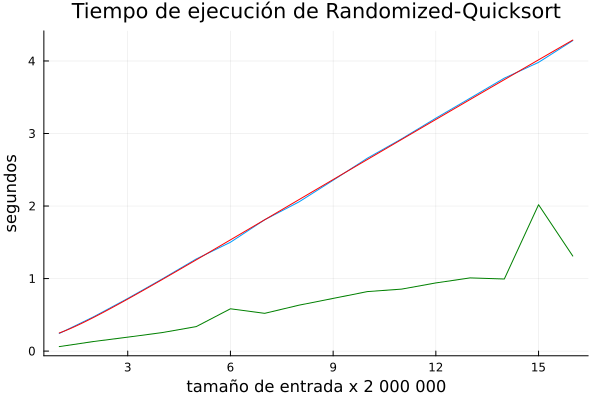

In [15]:
u = range(1, 16, length = 16)
plot!(u, v, color = :green)

Regresar al **[Índice](#indice)**.

<a id='referencias'></a>
## 6. Referencias

$[1]$ Burden, R. L., Faires, J. D., Rurden, A. (2015). **Numerical analysis**. Cengage Learning, 10E.

$[2]$ Cormen, T. H., Leiserson, C. E., Rivest, R. L. y Stein C. (2022). **Introduction to algorithms**. MIT Press, 4E.